In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

print('boston.data=',boston.data.shape)
print('boston.target=',boston.target.shape)

boston.data= (506, 13)
boston.target= (506,)


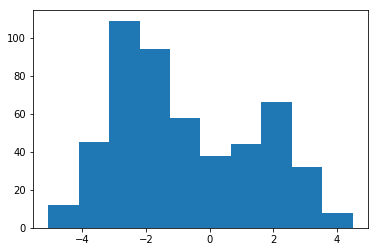

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#import numpy as np
#A=np.random.randn(13,1)
#boston.data=np.dot(boston.data,A)

#boston.data=boston.data[:,0:1]
import numpy as np
boston.data[:,0]=np.log(boston.data[:,0])
plt.hist(boston.data[:,0])
#plt.hist(boston.target)
plt.show()


In [4]:
n=400

training_x = boston.data[:n,:]
training_y = boston.target[:n]

test_x = boston.data[n:,:]
test_y = boston.target[n:]

print('training_x=',training_x.shape)
print('training_y=',training_y.shape)

print('test_x=',test_x.shape)
print('test_y=',test_y.shape)

training_x= (400, 13)
training_y= (400,)
test_x= (106, 13)
test_y= (106,)


In [5]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(training_x,training_y)
test_x_predict=model.predict(test_x)

#print('test_x_predict=',test_x_predict)

from sklearn import metrics
metrics.mean_squared_error(test_x_predict,test_y)**(0.5)

5.818330042432814

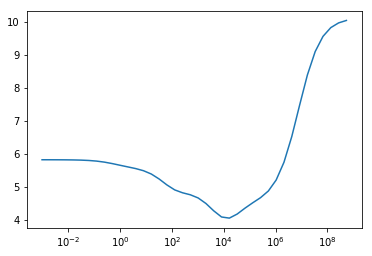

In [6]:
from sklearn import metrics
def do_ridge(alpha):
    from sklearn import linear_model
    model=linear_model.Ridge(alpha=alpha)
    model.fit(training_x,training_y)
    test_x_predict=model.predict(test_x)
    return metrics.mean_squared_error(test_x_predict,test_y)**(0.5)
    
alphas=[2**i for i in range(-10,30)]
scores=[do_ridge(alpha) for alpha in alphas]

plt.plot(alphas,scores)
plt.xscale('log')
plt.show()

In [10]:
from sklearn import linear_model
model=linear_model.Lasso(alpha=1)
model.fit(training_x,training_y)
test_x_predict=model.predict(test_x)

#print('test_x_predict=',test_x_predict)

from sklearn import metrics
metrics.mean_squared_error(test_x_predict,test_y)**(0.5)

print('w=',model.coef_)

w= [ 0.          0.04801757 -0.          0.         -0.          1.75309791
  0.02818052 -0.71686963  0.33314558 -0.01765145 -0.64538078  0.00859878
 -0.80092007]
